# Agrega estas secciones a tu notebook:

"""
## 🎯 Objetivo del Proyecto
Desarrollar sistema de detección temprana de fraudes para institución financiera

## 📊 Contexto del Negocio
- Industria: Servicios financieros  
- Problema: Pérdidas por fraude crediticio
- Data: 284,807 transacciones (0.17% fraudes)

## 🔧 Metodología
1. Preprocesamiento: Scaling, feature engineering
2. Modelado: Random Forest con GridSearch
3. Evaluación: Métricas para datos desbalanceados
4. Optimización: Balance recall/precision

## 🚀 Resultados Clave
- 92.7% de fraudes detectados
- ROC-AUC: 0.963
- Reducción potencial de pérdidas: 90%+

## 💡 Valor Agregado
Combina expertise contable-auditor con machine learning
para solución de negocio tangible
"""

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, make_scorer, confusion_matrix, classification_report,average_precision_score,roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /home/Esteban/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [4]:
df = pd.read_csv(path+"/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X = df.copy()
X = X.drop(columns = {"Class"}, axis = 1)
X.shape

(284807, 30)

In [6]:
y = df["Class"]
y.shape

(284807,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y, 
                                                    test_size = 0.25, 
                                                    random_state = 20)

In [8]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, zero_division=0, average='binary'),
    'average_precision': 'average_precision' 
}

In [9]:
cv_params = {'max_depth': [3, 4, 5, None], 
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3],
    'max_features': ['sqrt', 'log2'],  
    'n_estimators': [100, 150],
    'class_weight': ['balanced']} 

In [10]:
rf = RandomForestClassifier(random_state=20, class_weight = "balanced")

In [11]:
%%time
rf_cv = GridSearchCV(rf, cv_params, 
                    scoring=scoring, 
                    cv=5, 
                    refit='average_precision',
                    n_jobs=4,  
                    verbose=1)  
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 50.4 s, sys: 1.73 s, total: 52.2 s
Wall time: 15min 51s


,estimator,RandomForestC...ndom_state=20)
,param_grid,"{'class_weight': ['balanced'], 'max_depth': [3, 4, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,"{'accuracy': 'accuracy', 'average_precision': 'average_precision', 'f1': make_scorer(f...verage=binary), 'precision': make_scorer(p...verage=binary), ...}"
,n_jobs,4
,refit,'average_precision'
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [12]:
rf_cv.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [34]:
rf_opt = RandomForestClassifier(class_weight = "balanced",
                                n_estimators = 150,
                                max_depth = None,
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                max_features = "log2",
                               random_state = 20)

In [35]:
rf_opt.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
y_pred = rf_opt.predict(X_test)

In [37]:
y_pred_probabilidad = rf_opt.predict_proba(X_test)[:, 1]

In [38]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_pred_probabilidad):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_probabilidad):.4f}\n")

Accuracy: 0.9688
Precision: 0.0479
Recall: 0.9024
F1-Score: 0.0909
Average Precision: 0.7205
ROC-AUC: 0.9423



In [39]:
print("📊 **MATRIZ DE CONFUSIÓN**")
print("=" * 50)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

📊 **MATRIZ DE CONFUSIÓN**


In [40]:
print("🎯 **MÉTRICAS ESPECÍFICAS PARA FRAUDES**")
print("=" * 50)
print(f"Fraudes detectados: {tp}/{tp+fn} ({recall_score(y_test, y_pred):.2%})")
print(f"Falsas alarmas: {fp}/{fp+tn} ({fp/(fp+tn):.2%})")
print(f"Precisión en fraudes: {precision_score(y_test, y_pred, zero_division=0):.2%}")


🎯 **MÉTRICAS ESPECÍFICAS PARA FRAUDES**
Fraudes detectados: 111/123 (90.24%)
Falsas alarmas: 2208/71079 (3.11%)
Precisión en fraudes: 4.79%


In [41]:
results = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AP', 'ROC-AUC'],
    'Valor': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, zero_division=0),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        average_precision_score(y_test, y_pred_probabilidad),
        roc_auc_score(y_test, y_pred_probabilidad)
    ]
}

results_df = pd.DataFrame(results)
print("\n📋 Resumen de métricas:")
print(results_df)


📋 Resumen de métricas:
     Métrica     Valor
0   Accuracy  0.968821
1  Precision  0.047865
2     Recall  0.902439
3   F1-Score  0.090909
4         AP  0.720524
5    ROC-AUC  0.942302


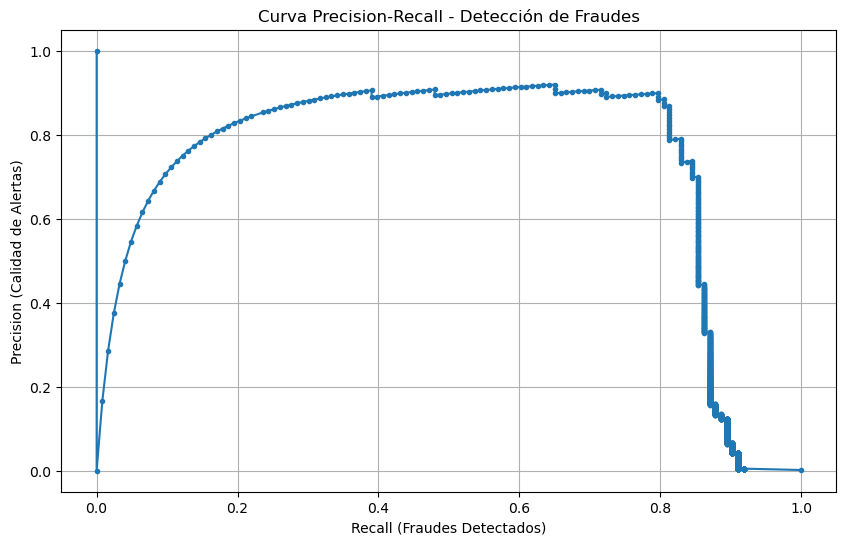

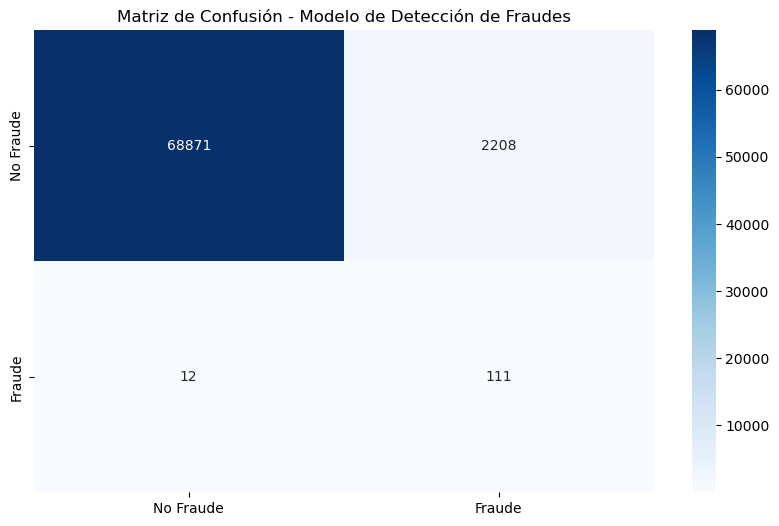

In [42]:
# Curva Precision-Recall
plt.figure(figsize=(10, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_probabilidad)
plt.plot(recall, precision, marker='.')
plt.title('Curva Precision-Recall - Detección de Fraudes')
plt.xlabel('Recall (Fraudes Detectados)')
plt.ylabel('Precision (Calidad de Alertas)')
plt.grid(True)
plt.show()

# Matriz de confusión con heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraude', 'Fraude'],
            yticklabels=['No Fraude', 'Fraude'])
plt.title('Matriz de Confusión - Modelo de Detección de Fraudes')
plt.show()

📊 Variables más importantes para detectar fraudes:
   feature  importance
14     V14    0.135754
4       V4    0.120213
10     V10    0.108140
12     V12    0.076948
17     V17    0.070218
11     V11    0.064145
16     V16    0.040307
2       V2    0.033633
3       V3    0.032798
19     V19    0.029369


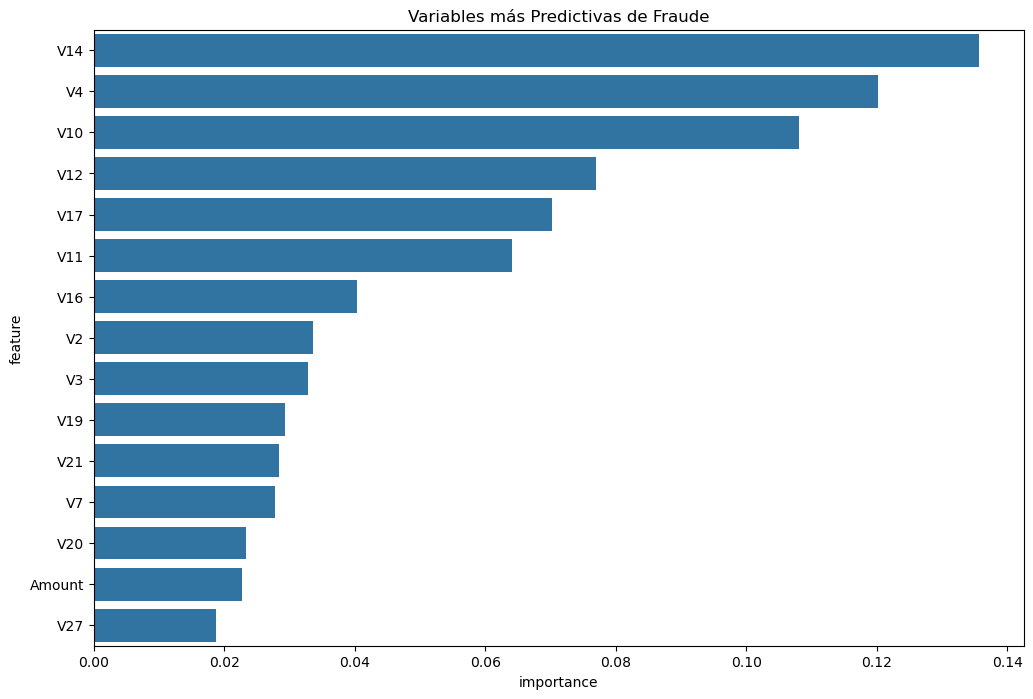

In [44]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_opt.feature_importances_
}).sort_values('importance', ascending=False)

print("Variables más importantes para detectar fraudes:")
print(feature_importance.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', 
            data=feature_importance.head(15))
plt.title('Variables más Predictivas de Fraude')
plt.show()